# Random forest feature inspection function

## Inspecting feature importance

### Splitting the data

In [3]:
from sklearn.model_selection import train_test_split
    
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    return X_train, X_test, y_train, y_test

### Building the Random forest classifier

In [4]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

def train_rf_model(X_train,y_train, X_test):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

### Testing with toy dataset from sklearn

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)

### Plotting confusion matrix

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = unique_labels(y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax


## Feature importances

### Get the feature importances

In [7]:
def get_feature_importances(trained_model, X_train):
    feature_importances = pd.DataFrame(trained_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    return feature_importances
    

### One function to call them all

In [13]:
def get_model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    rf, y_train_pred, y_test_pred = train_rf_model(X_train,y_train, X_test)
    features_imp = get_feature_importances(rf,X_train)
    plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    return features_imp
    

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.05263158 0.89473684 0.05263158]
 [0.         0.         1.        ]]


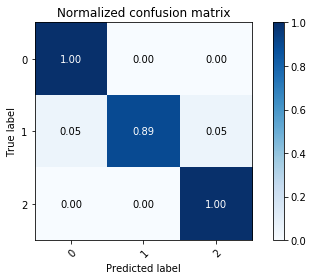

,importance
color_intensity,0.281701
flavanoids,0.225803
alcohol,0.083689
hue,0.083087
proline,0.081254
malic_acid,0.067380
alcalinity_of_ash,0.058752
od280/od315_of_diluted_wines,0.041080
proanthocyanins,0.040759
magnesium,0.017308


In [14]:
get_model(X,y)